<a href="https://colab.research.google.com/github/mariyyah1/PythonCode_datasince_project/blob/main/proje4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd  #for data manipulation operations
import numpy as np  #for numeric operations on data
import seaborn as sns  #for data visualization operations
import matplotlib.pyplot as plt  #for data visualization operations
from sklearn.preprocessing import LabelEncoder # for encoding
from sklearn.preprocessing import StandardScaler #for standardization

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from termcolor import colored
#!pip install xgboost
from xgboost import XGBRegressor

#!pip install lightgbm
from lightgbm import LGBMRegressor

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn import set_config
set_config(print_changed_only = False)

sns.set_theme(style = "whitegrid")

print(colored("\n THE REQUIRED LIBRARIES WERE SUCCESFULLY IMPORTED...", color = "green", attrs = ["bold", "dark"]))


 THE REQUIRED LIBRARIES WERE SUCCESFULLY IMPORTED...


In [2]:
heart = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
df = heart.copy()
df.head(n = 10).style.background_gradient(cmap = "Reds_r").set_properties(**{"font-family" : "Segoe UI"}).hide_index()

age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
75.000000,0,582,0,20,1,265000.000000,1.900000,130,1,0,4,1
55.000000,0,7861,0,38,0,263358.030000,1.100000,136,1,0,6,1
65.000000,0,146,0,20,0,162000.000000,1.300000,129,1,1,7,1
50.000000,1,111,0,20,0,210000.000000,1.900000,137,1,0,7,1
65.000000,1,160,1,20,0,327000.000000,2.700000,116,0,0,8,1
90.000000,1,47,0,40,1,204000.000000,2.100000,132,1,1,8,1
75.000000,1,246,0,15,0,127000.000000,1.200000,137,1,0,10,1
60.000000,1,315,1,60,0,454000.000000,1.100000,131,1,1,10,1
65.000000,0,157,0,65,0,263358.030000,1.500000,138,0,0,10,1
80.000000,1,123,0,35,1,388000.000000,9.400000,133,1,1,10,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df_eda = pd.DataFrame()

df_eda["age"] = df["age"]
df_eda["anaemia"] = np.where(df["anaemia"] < 1, "no", "yes")
df_eda["creatinine_phosphokinase"] = df["creatinine_phosphokinase"]
df_eda["diabetes"] = np.where(df["diabetes"] < 1, "no", "yes")
df_eda["ejection_fraction"] = df["ejection_fraction"]
df_eda["high_blood_pressure"] = np.where(df["high_blood_pressure"] < 1, "no", "yes")
df_eda["platelets"] = df["platelets"]
df_eda["serum_creatinine"] = df["serum_creatinine"]
df_eda["serum_sodium"] = df["serum_sodium"]
df_eda["sex"] = np.where(df["sex"] < 1, "female", "male")
df_eda["smoking"] = np.where(df["smoking"] < 1, "no", "yes")
df_eda["time"] = df["time"]
df_eda["death_event"] = np.where(df["DEATH_EVENT"] < 1, "no", "yes")

df_eda.head().style.background_gradient(cmap = "Reds").set_properties(**{"font-family" : "Segoe UI"}).hide_index()

age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
75.000000,no,582,no,20,yes,265000.000000,1.900000,130,male,no,4,yes
55.000000,no,7861,no,38,no,263358.030000,1.100000,136,male,no,6,yes
65.000000,no,146,no,20,no,162000.000000,1.300000,129,male,yes,7,yes
50.000000,yes,111,no,20,no,210000.000000,1.900000,137,male,no,7,yes
65.000000,yes,160,yes,20,no,327000.000000,2.700000,116,female,no,8,yes


In [5]:
df_eda.describe().T.style.background_gradient(cmap = "Reds_r").set_properties(**{"font-family" : "Segoe UI"})

,count,mean,std,min,25%,50%,75%,max
age,299.000000,60.833893,11.894809,40.000000,51.000000,60.000000,70.000000,95.000000
creatinine_phosphokinase,299.000000,581.839465,970.287881,23.000000,116.500000,250.000000,582.000000,7861.000000
ejection_fraction,299.000000,38.083612,11.834841,14.000000,30.000000,38.000000,45.000000,80.000000
platelets,299.000000,263358.029264,97804.236869,25100.000000,212500.000000,262000.000000,303500.000000,850000.000000
serum_creatinine,299.000000,1.393880,1.034510,0.500000,0.900000,1.100000,1.400000,9.400000
serum_sodium,299.000000,136.625418,4.412477,113.000000,134.000000,137.000000,140.000000,148.000000
time,299.000000,130.260870,77.614208,4.000000,73.000000,115.000000,203.000000,285.000000


In [6]:
df.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

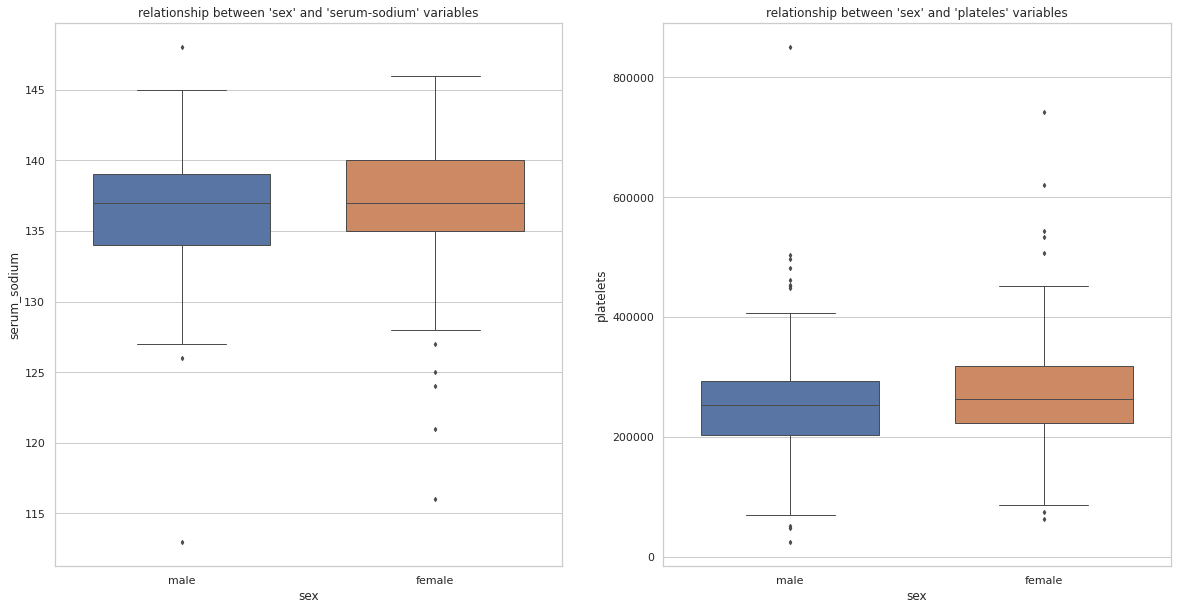

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))


sns.boxplot(ax = axes[0], x = "sex", y = "serum_sodium", data = df_eda, width = 0.7,
            orient = "v", fliersize = 3, linewidth = 1);
axes[0].set_title("relationship between 'sex' and 'serum-sodium' variables");

sns.boxplot(ax = axes[1], x = "sex", y = "platelets", data = df_eda, width = 0.7,
            orient = "v", fliersize = 3, linewidth = 1);
axes[1].set_title("relationship between 'sex' and 'plateles' variables");

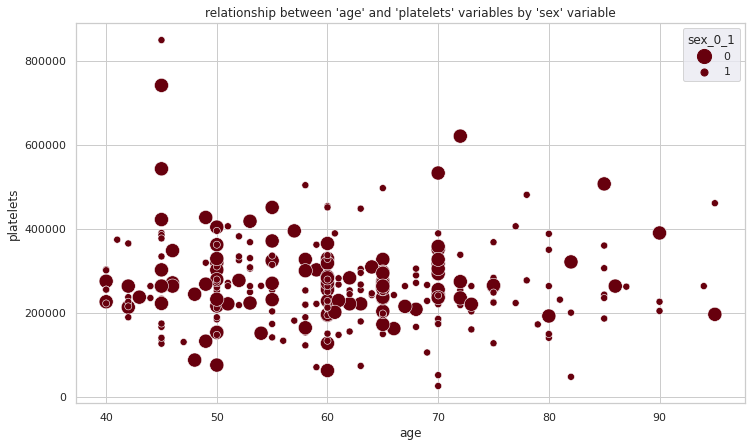

In [8]:
df_eda["sex_0_1"] = np.where(df_eda["sex"] == "male", 1, 0)

fig, axes = plt.subplots(figsize = (12, 7))

sns.set_theme(style = "darkgrid")

sns.scatterplot(data = df_eda, x = "age", y = "platelets", hue = "sex_0_1",
    palette = "Reds_r", size = "sex_0_1", sizes = (50, 200), hue_norm = (2, 8),
    legend="auto").set(title = "relationship between 'age' and 'platelets' variables by 'sex' variable");

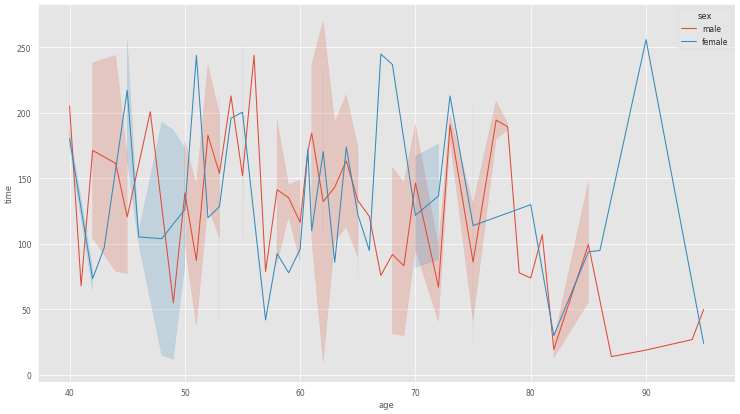

In [9]:
plt.figure(figsize = (18, 10), dpi = 50)
plt.style.use('ggplot')
sns.lineplot(data = df_eda, x = "age", y = "time", hue = "sex" );

------end part

In [10]:
df.head().style.background_gradient(cmap = "Reds_r")

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.000000,0,582,0,20,1,265000.000000,1.900000,130,1,0,4,1
1,55.000000,0,7861,0,38,0,263358.030000,1.100000,136,1,0,6,1
2,65.000000,0,146,0,20,0,162000.000000,1.300000,129,1,1,7,1
3,50.000000,1,111,0,20,0,210000.000000,1.900000,137,1,0,7,1
4,65.000000,1,160,1,20,0,327000.000000,2.700000,116,0,0,8,1


creat ml

In [11]:
# we select dependent variable (label)
y = df["DEATH_EVENT"]

# we select independent variable
x = df.drop("DEATH_EVENT", axis = 1)

print(colored("\n DEPENDENT AND INDEPENDENT VARIABLES WERE SUCCESFULLY SELECTED...", color = "green", attrs = ["bold", "dark"]))


 DEPENDENT AND INDEPENDENT VARIABLES WERE SUCCESFULLY SELECTED...


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.20,
                                                    shuffle = True,
                                                    random_state = 1)

print(colored("\n THE DATASET WERE SUCCESFULLY SPLITTED - test = 20%, train = 80%...", color = "green", attrs = ["bold", "dark"]))


 THE DATASET WERE SUCCESFULLY SPLITTED - test = 20%, train = 80%...


In [13]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

print(colored("\n x_train AND x_test SETS WERE SUCCESFULLY STANDARIZED", color = "green", attrs = ["bold", "dark"]))


 x_train AND x_test SETS WERE SUCCESFULLY STANDARIZED


In [14]:
x_train[0:5]

array([[-1.33194278,  1.11069566, -0.4576634 , -0.84818893, -0.24318058,
        -0.72269841, -0.89319445, -0.58084862,  0.51465589,  0.72941845,
         1.52297224, -0.10575054],
       [-0.4999137 , -0.90033664, -0.51894319, -0.84818893,  0.17737049,
        -0.72269841, -0.57954879, -0.39670905,  0.29500811,  0.72941845,
        -0.65661079,  1.33189826],
       [ 0.58172409,  1.11069566,  0.39546617,  1.17898261, -0.24318058,
        -0.72269841,  0.15589621, -0.30463927, -0.58358301,  0.72941845,
        -0.65661079,  0.86979686],
       [-0.08389917,  1.11069566, -0.02487488, -0.84818893, -0.66373165,
         1.38370306, -1.40151673, -0.48877884,  1.83254257, -1.37095517,
        -0.65661079, -0.43949044],
       [-0.08389917, -0.90033664, -0.35712624,  1.17898261,  0.00915007,
        -0.72269841,  0.78318753,  1.44468663,  1.17359923, -1.37095517,
        -0.65661079, -1.27384019]])

In [15]:
x_test[0:5]

array([[-0.91592824,  1.11069566, -0.47202585, -0.84818893, -1.5048338 ,
        -0.72269841, -0.73096394, -0.58084862,  0.51465589,  0.72941845,
        -0.65661079,  0.21515321],
       [-1.33194278, -0.90033664, -0.02487488,  1.17898261,  1.43902371,
        -0.72269841,  3.09767621, -0.39670905, -1.02287857, -1.37095517,
        -0.65661079,  1.55011281],
       [-0.66631952,  1.11069566, -0.49500577, -0.84818893, -1.5048338 ,
         1.38370306,  1.74575525, -0.02842992,  0.51465589, -1.37095517,
        -0.65661079, -1.10697024],
       [-0.74952242, -0.90033664, -0.4557484 , -0.84818893, -0.66373165,
        -0.72269841, -0.41731828, -0.67291841, -0.14428745,  0.72941845,
         1.52297224, -0.22127589],
       [ 0.33211537,  1.11069566, -0.45287591, -0.84818893, -0.24318058,
         1.38370306,  0.36138819, -0.58084862, -0.58358301,  0.72941845,
        -0.65661079,  0.83128841]])

In [16]:
rf = RandomForestClassifier()

In [17]:
#parametres for search
rf_params = {"max_depth": [3, 5, 8, 10],
             "max_features": [3, 5, 8, 10],
             "n_estimators": [10, 500, 1000],
             "min_samples_split": [2, 5, 10]}

# Search the best parametres with GridSearchCV() function
rf_cv_model = GridSearchCV(rf, rf_params, cv = 10, n_jobs = -1)
rf_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                             

In [18]:
# get the best parametres

rf_cv_model.best_params_

{'max_depth': 5,
 'max_features': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [19]:
rf_model = RandomForestClassifier(n_estimators = rf_cv_model.best_params_["n_estimators"],
                                max_depth = rf_cv_model.best_params_["max_depth"],
                                max_features = rf_cv_model.best_params_["max_features"],
                                min_samples_split = rf_cv_model.best_params_["min_samples_split"])
rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [20]:
y_pred = rf_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9166666666666666

Text(0, 0.5, 'Variables')

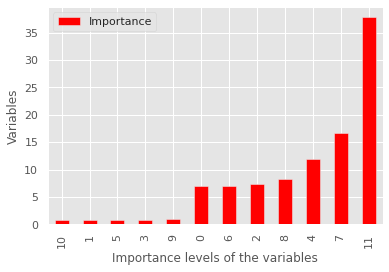

In [21]:
importance = pd.DataFrame({"Importance": rf_model.feature_importances_ * 100},
                         index = pd.DataFrame(x_train).columns)
importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind = "bar", color = "red")
plt.xlabel("Importance levels of the variables")
plt.ylabel("Variables")

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        46
           1       0.91      0.71      0.80        14

    accuracy                           0.92        60
   macro avg       0.91      0.85      0.87        60
weighted avg       0.92      0.92      0.91        60



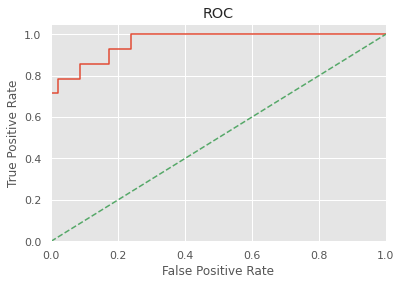

In [23]:
rf_roc_auc = roc_auc_score(y_test, rf_model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
health_h = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

In [26]:
health_h.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [27]:
health_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [28]:
health_h.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [29]:
health_h.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

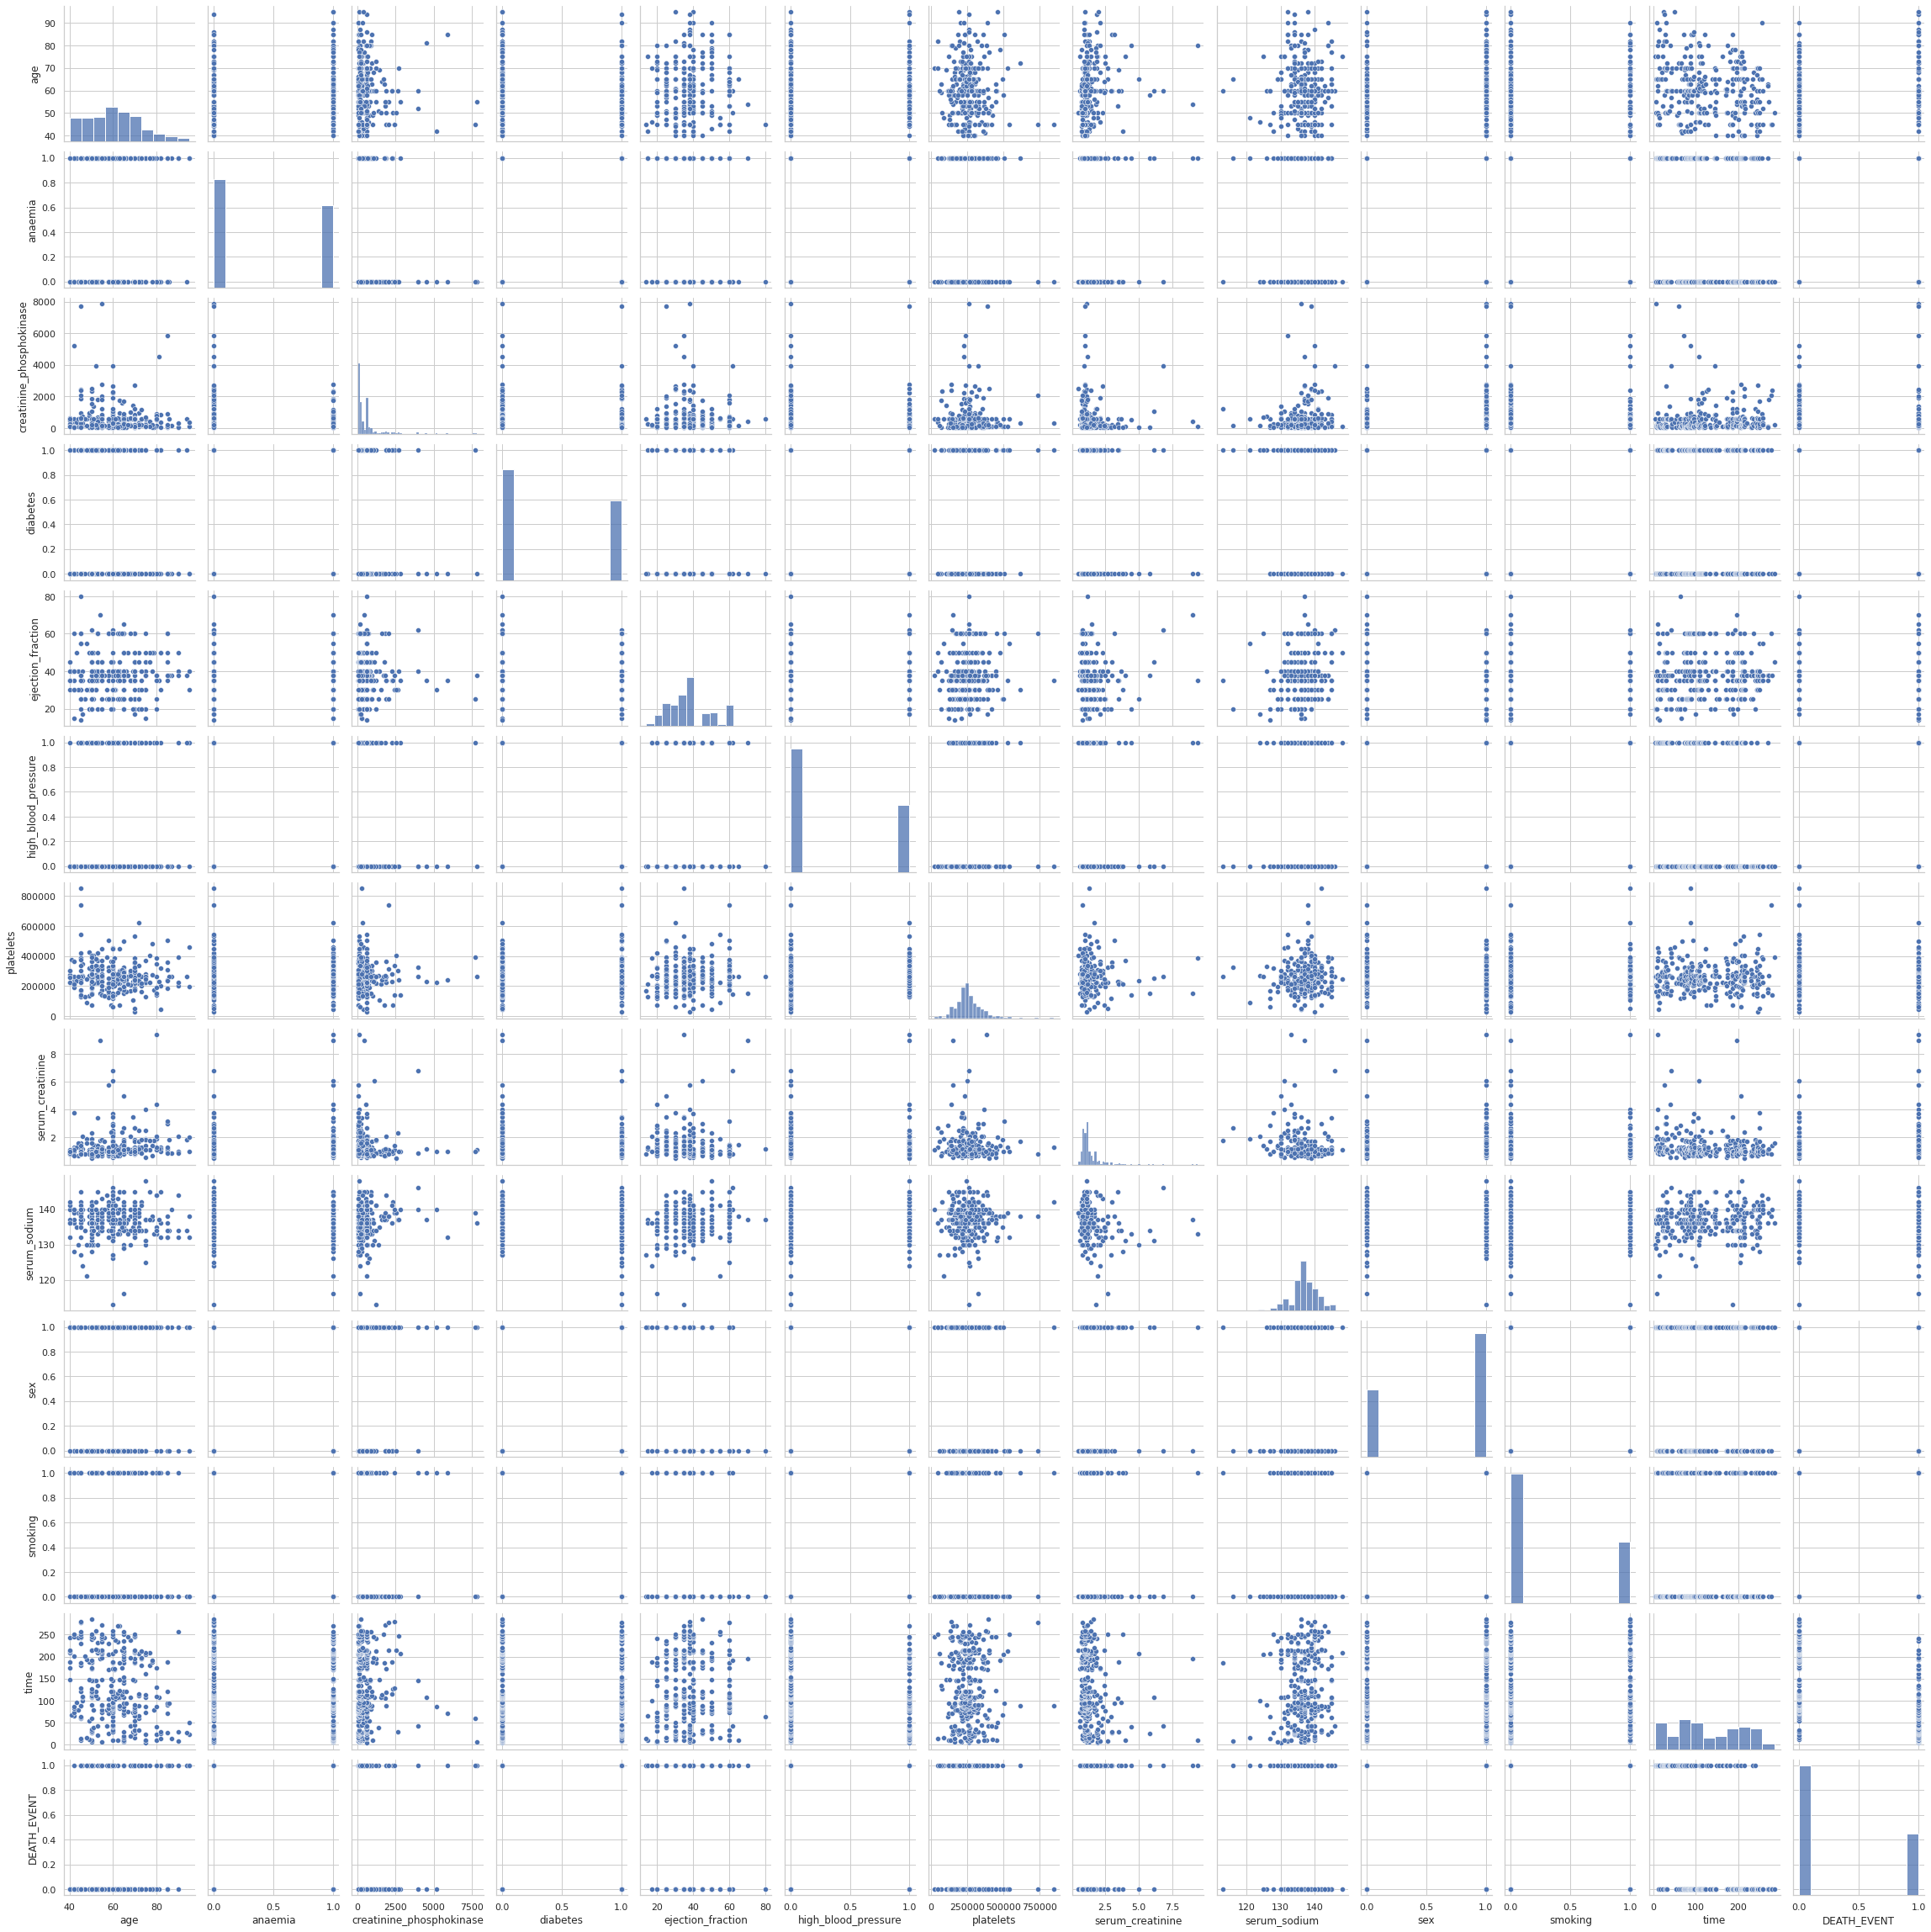

In [ ]:
sns.pairplot(health_h)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(x_train, y_train)

y_pred_KNN = KNNClassifier.predict(x_test)

In [33]:
KNNClassifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [34]:
y_pred_KNN = KNNClassifier.predict(x_test)

In [35]:
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')

.:. K-Nearest Neighbour Accuracy: 80.00% .:.


In [37]:
from sklearn.svm import SVC

In [38]:
SVMclassifier = SVC(kernel='linear', max_iter=1000, C=10, probability=True)
SVMclassifier.fit(x_train, y_train)

y_pred_SVM = SVMclassifier.predict(x_test)

In [40]:
SVMAcc = accuracy_score(y_pred_SVM, y_test)
print('.:. Support Vector Machine Accuracy:'+'\033[1m {:.2f}%'.format(SVMAcc*100)+' .:.')

.:. Support Vector Machine Accuracy: 73.33% .:.


In [41]:
from sklearn.linear_model import LogisticRegression

In [43]:
LRclassifier = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')
LRclassifier.fit(x_train, y_train)

y_pred_LR = LRclassifier.predict(x_test)

In [44]:
# --- LR Accuracy ---
LRAcc = accuracy_score(y_pred_LR, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRAcc*100)+' .:.')

.:. Logistic Regression Accuracy: 86.67% .:.


In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
GNBclassifier = GaussianNB(var_smoothing=0.1)
GNBclassifier.fit(x_train, y_train)

y_pred_GNB = GNBclassifier.predict(x_test)

In [47]:
# --- GNB Accuracy ---
GNBAcc = accuracy_score(y_pred_GNB, y_test)
print('.:. Gaussian Naive Bayes Accuracy:'+'\033[1m {:.2f}%'.format(GNBAcc*100)+' .:.')

.:. Gaussian Naive Bayes Accuracy: 81.67% .:.


In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
# --- Applying Decision Tree ---
DTCclassifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy', min_samples_split=5,
                                       splitter='random', random_state=1)

DTCclassifier.fit(x_train, y_train)
y_pred_DTC = DTCclassifier.predict(x_test)

In [50]:
DTCAcc = accuracy_score(y_pred_DTC, y_test)
print('.:. Decision Tree Accuracy:'+'\033[1m {:.2f}%'.format(DTCAcc*100)+' .:.')

.:. Decision Tree Accuracy: 75.00% .:.


In [51]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier

In [53]:
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(x_train, y_train)
y_pred_RF = RFclassifier.predict(x_test)

In [54]:
# --- Random Forest Accuracy ---
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

.:. Random Forest Accuracy: 90.00% .:.


In [55]:
# --- Applying Gradient Boosting ---
GBclassifier = GradientBoostingClassifier(random_state=1, n_estimators=100, max_leaf_nodes=3, loss='exponential', 
                                          min_samples_leaf=20)

GBclassifier.fit(x_train, y_train)
y_pred_GB = GBclassifier.predict(x_test)

In [56]:
# --- Gradient Boosting Accuracy ---
GBAcc = accuracy_score(y_pred_GB, y_test)
print('.:. Gradient Boosting Accuracy:'+'\033[1m {:.2f}%'.format(GBAcc*100)+' .:.')

.:. Gradient Boosting Accuracy: 85.00% .:.


In [57]:
# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                  'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boosting'
                                  ], 
                        'Accuracy': [LRAcc*100, KNNAcc*100, SVMAcc*100, GNBAcc*100, DTCAcc*100, RFAcc*100, GBAcc*100, 
                                     ]})

# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

Model,Accuracy
Random Forest,90.000000
Logistic Regression,86.666667
Gradient Boosting,85.000000
Gaussian Naive Bayes,81.666667
K-Nearest Neighbour,80.000000
Decision Tree,75.000000
Support Vector Machine,73.333333


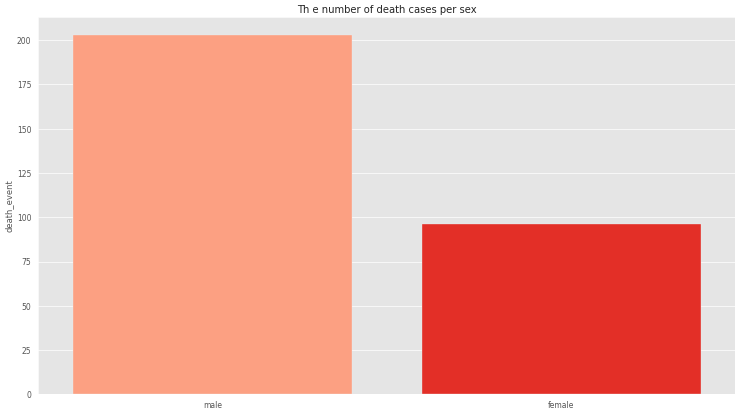

In [61]:
plt.figure(figsize = (18, 10), dpi = 50)

sns.barplot(x = df_eda["sex"].value_counts().index,
            y = df_eda["death_event"].value_counts(),
            data = df_eda, palette = "Reds", 
            saturation = 1).set(title = "Th e number of death cases per sex");

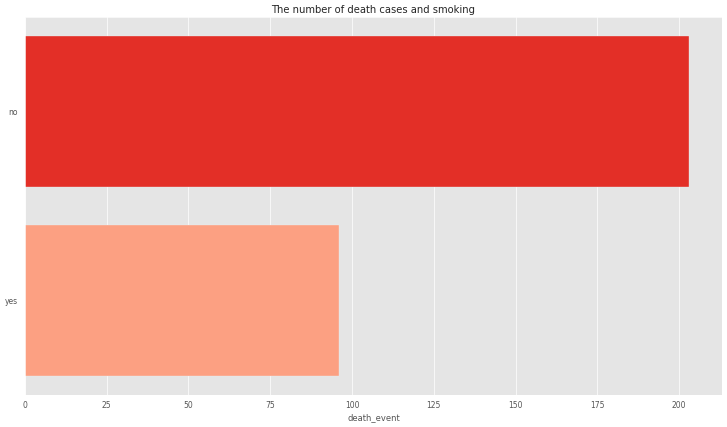

In [62]:
plt.figure(figsize = (18, 10), dpi = 50)

sns.barplot(y = df_eda["smoking"].value_counts().index,
            x = df_eda["death_event"].value_counts(),
            data = df_eda, palette = "Reds_r", 
            saturation = 1,
            orient = "h").set(title = "The number of death cases and smoking");

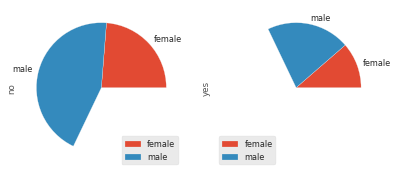

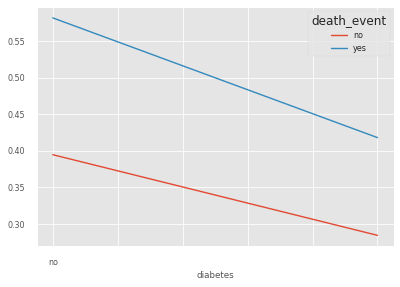

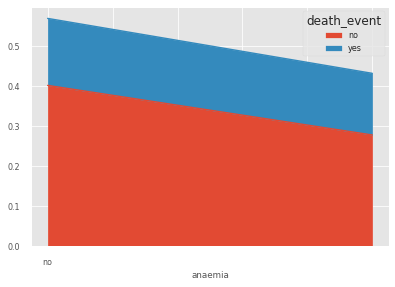

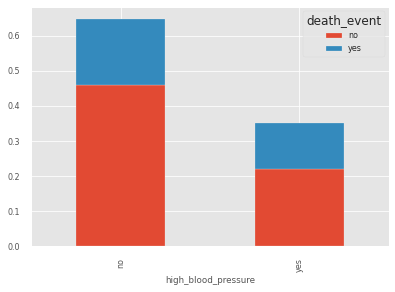

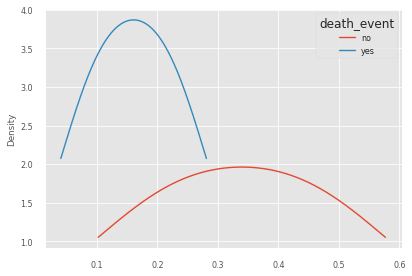

In [64]:
plt.style.use('seaborn-paper')

pd.crosstab(df_eda['sex'], df_eda['death_event'],normalize = True).plot(kind = "pie", subplots = True, stacked = True );

pd.crosstab(df_eda['diabetes'], df_eda['death_event'], normalize = True).plot(kind = "line", stacked = True);

pd.crosstab(df_eda['anaemia'], df_eda['death_event'], normalize = True).plot(kind = "area", stacked = True);

pd.crosstab(df_eda['high_blood_pressure'], df_eda['death_event'], normalize = True).plot(kind = "bar", stacked = True);

pd.crosstab(df_eda['smoking'], df_eda['death_event'], normalize = True).plot(kind = "kde", stacked = True);